In [1]:
import numpy as np
import h5py
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import yaml
import argparse
import itertools
import xml.etree.ElementTree as ET

sys.path.append('../')
import utils
import settings
plt.style.use('../spectrum.mplstyle')

In [2]:
files = {
#     "Single Pivot n4 m4 d16": "single_pivot",
    "Single Pivot": "single_pivot",
#     "Modified Rolling Pivot n4 m4 z16": "modified_rolling_pivot",
#     "Traditional Rolling Pivot (fixed rank)": "rolling_pivot_4-4-16_v2",
    "Rolling Pivot": "rolling_pivot_falling_rank",
#     "Traditional Rolling Pivot (falling rank)": "rolling_pivot_falling_rank",
#     "Traditional Rolling Pivot n4 m4 z16": "rolling_pivot_4-4-16",
#     "Traditional Rolling Pivot n4 m8 z16": "rolling_pivot_4-8-16",
#     "Traditional Rolling Pivot n2 m2 z16": "rolling_pivot_2-2-16",
#     "Traditional Rolling Pivot (w=0.6)": "rolling_pivot_w60",
}

In [3]:
# #isosinglet nn
# files = {
# #     "Single Pivot n4 m4 d10": "isosinglet_nn_4-10",
#     "Traditional Rolling Pivot": "isosinglet_nn_4-10r",
# }

In [4]:
data = {}
for pivot in files.keys():
    csv_filter = np.array([x.endswith("csv") for x in os.listdir(files[pivot])])
    csv_files = np.array(os.listdir(files[pivot]))[csv_filter]
    for csv_file in csv_files:
        data_tag = csv_file[:-4]
        if data_tag not in data.keys():
            data[data_tag] = {}
        data[data_tag][pivot] = pd.read_csv(os.path.join(files[pivot],csv_file))

In [5]:
print(data)

{'isosinglet_S-1_P0_G1g_ROT_0': {'Single Pivot':        t     value     error
0    2.0  2.903741  0.003926
1    3.0  1.650118  0.002391
2    4.0  1.000000  0.001500
3    5.0  0.629591  0.001000
4    6.0  0.406555  0.000653
5    7.0  0.267214  0.000441
6    8.0  0.177923  0.000308
7    9.0  0.119590  0.000217
8   10.0  0.080922  0.000160
9   11.0  0.055055  0.000118
10  12.0  0.037615  0.000089
11  13.0  0.025819  0.000066
12  14.0  0.017779  0.000050
13  15.0  0.012279  0.000037
14  16.0  0.008491  0.000028
15  17.0  0.005879  0.000022
16  18.0  0.004080  0.000017
17  19.0  0.002828  0.000014
18  20.0  0.001960  0.000011
19  21.0  0.001359  0.000008
20  22.0  0.000948  0.000007
21  23.0  0.000659  0.000005
22  24.0  0.000460  0.000004
23  25.0  0.000322  0.000003, 'Rolling Pivot':        t     value     error
0    2.0  2.879936  0.003628
1    3.0  1.646746  0.002279
2    4.0  1.000000  0.001461
3    5.0  0.629958  0.000979
4    6.0  0.406829  0.000642
5    7.0  0.267366  0.000436
6    

C:\Users\sarah\AppData\Local\Temp\ipykernel_24460\1277940390.py:31: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


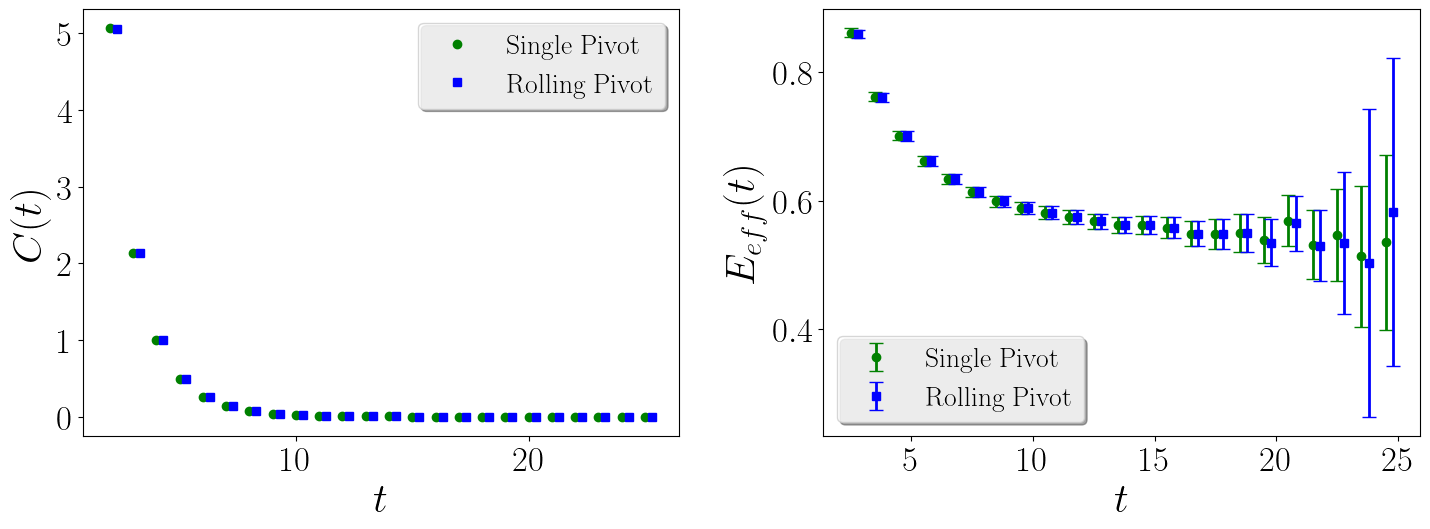

In [16]:
f = plt.figure(facecolor="white")
f.set_figwidth(15)
f.set_figheight(6)
for corr in data.keys():
    dd = 0.0
    plt.clf()
#     f.suptitle(corr.replace("_"," "))
    plt.subplot(1,2,1)
    for i, pivot in enumerate(data[corr].keys()):
        this_data = data[corr][pivot]
        plt.plot( this_data['t']+dd, this_data['value'], label=pivot,  color=settings.colors[i], marker=settings.markers[i], linewidth=0.0 )
#         plt.errorbar( this_data['t']+dd, this_data['value'], label=pivot,  color=settings.colors[i], marker=settings.markers[i], linewidth=0.0 , elinewidth=2.0, capsize=5.0)
        dd+=0.3
    plt.legend()
    plt.xlabel("$t$")
    plt.ylabel("$C(t)$")
    plt.subplot(1,2,2)
    dd = 0.0
    for i, pivot in enumerate(data[corr].keys()):
        this_data = data[corr][pivot]
        these_values = np.array(this_data['value'])
        these_errors = np.array(this_data['error'])
        new_t, new_vals = utils.effenergy( np.array(this_data['t']) , these_values )
        errs = abs(these_values[:-1]/these_values[1:])*np.sqrt( (these_errors[:-1]/these_values[:-1])**2+(these_errors[1:]/these_values[1:])**2 - (these_errors[:-1]/these_values[:-1])*(these_errors[1:]/these_values[1:]))
        errs = errs/abs(new_vals)
        plt.errorbar( new_t+dd, new_vals, errs ,  label=pivot,  color=settings.colors[i], marker=settings.markers[i], linewidth=0.0, elinewidth=2.0, capsize=5.0)
        dd+=0.3
    plt.legend()
    plt.xlabel("$t$")
    plt.ylabel("$E_{eff}(t)$")
    plt.tight_layout()
    plt.savefig(corr+".png")